# Ensemble of Classical Models

From the previous notebook, we saw that both Naive Bayes Classifier and Random Forest Classifier performed really well. So, in this notebook we construct an ensemble of these and then note how the perfrmance varies

In [30]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score

In [31]:
df = pd.read_csv('data/cleaned_train.csv')
df.columns

Index(['id', 'marital_status', 'appln_mode', 'appln_order', 'prog_of_study',
       'morn/eve_attend', 'prev_edu', 'prev_edu_grade', 'nationality',
       'mom_edu', 'dad_edu', 'mom_occup', 'admission_grade', 'was_displaced',
       'edu_spl_need', 'has_student_debt', 'no_fee_dues', 'gender',
       'got_scholarship', 'age_at_start', 'sem1_units_credited',
       'sem1_units_enrolled', 'sem1_units_eval', 'sem1_units_approved',
       'sem1_units_grade', 'sem1_units_no_eval', 'sem2_units_credited',
       'sem2_units_enrolled', 'sem2_units_eval', 'sem2_units_approved',
       'sem2_units_grade', 'sem2_units_no_eval', 'unemployment_rate',
       'inflation', 'gdp', 'Target', 'marital_status_log', 'appln_order_log',
       'prog_of_study_log', 'morn/eve_attend_log', 'prev_edu_log',
       'nationality_log', 'mom_occup_log', 'edu_spl_need_log',
       'has_student_debt_log', 'no_fee_dues_log', 'got_scholarship_log',
       'age_at_start_log', 'sem1_units_credited_log', 'sem1_units_grade_lo

In [32]:
X,y = df.drop(columns=['Target','id','nationality']).values, df['Target'].values

# Train test split
le = LabelEncoder()
y_l = le.fit(y)
y_enc = y_l.transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42)

First, let's train the Random Forest classifier with `300` estimators

In [33]:
%%time
model_rf = RandomForestClassifier(n_estimators=300)
start = time.perf_counter()
model_rf.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

Training ended in 36.7141449999981 s
CPU times: total: 33 s
Wall time: 36.7 s


In [34]:
y_pred = model_rf.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9418    0.8097    0.8708      4635
           1     0.6455    0.6470    0.6463      2969
           2     0.8548    0.9302    0.8909      7289

    accuracy                         0.8362     14893
   macro avg     0.8140    0.7956    0.8026     14893
weighted avg     0.8401    0.8362    0.8359     14893



The performance seems better than before, now let us train the LightGBM classifier

In [35]:
%%time
model_lg = LGBMClassifier()
start = time.perf_counter()
model_lg.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
Training ended in 0.8166644999982964 s
CPU times: total: 5.02 s
Wall time: 890 ms


In [36]:
y_pred = model_lg.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9365    0.8276    0.8787      4635
           1     0.6615    0.6554    0.6584      2969
           2     0.8614    0.9282    0.8936      7289

    accuracy                         0.8425     14893
   macro avg     0.8198    0.8038    0.8102     14893
weighted avg     0.8449    0.8425    0.8421     14893



Vary `n_estimators`

In [37]:
estims = [5,10,20,50,100,200,300]
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

n_best = estims[np.argmax(acc)]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
n_estimators: 5, time_taken: 0.12279870000202209s, accuracy: 0.8121936480225609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.15914

Text(0.5, 1.0, 'Training time')

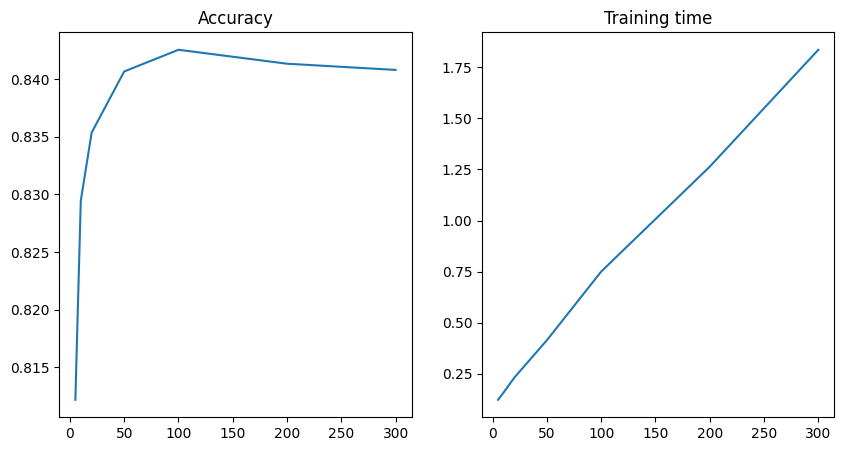

In [38]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

Try different boosting technique

In [39]:
params = {
    'boosting_type': 'rf',
    'bagging_freq': 1,
    'bagging_fraction': 0.8
}
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x,**params)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
[LightGBM] [Warning] bagging_fracti

Text(0.5, 1.0, 'Training time')

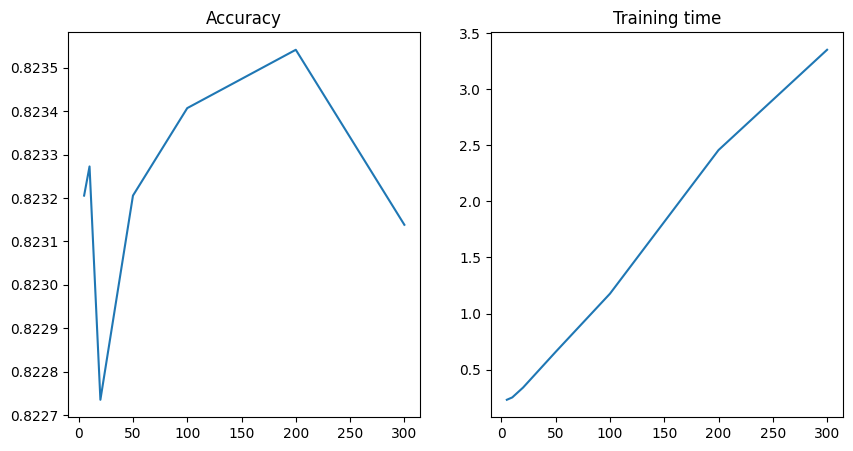

In [40]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

Different boosting did not work

In [41]:
%%time
model_lgbm = LGBMClassifier(n_estimators=n_best)
start = time.perf_counter()
model_lgbm.fit(X_train,y_train)
end = time.perf_counter()
y_pred = model_lgbm.predict(X_val)
print(f'Training time: {end-start}s, Accuracy: {round(accuracy_score(y_val,y_pred)*100,3)}%')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
Training time: 1.2324481000032392s, Accuracy: 84.254%
CPU times: total: 8.97 s
Wall time: 1.31 s


In [42]:
y_pred = model_lgbm.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9365    0.8276    0.8787      4635
           1     0.6615    0.6554    0.6584      2969
           2     0.8614    0.9282    0.8936      7289

    accuracy                         0.8425     14893
   macro avg     0.8198    0.8038    0.8102     14893
weighted avg     0.8449    0.8425    0.8421     14893



## The ensemble

The performance is similar to last time. Now let us combine these two models with weights `2` for Random Forest and `1` for Naive Bayes Classifier

In [43]:
%%time
soft_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='soft',weights=[1,1.2],verbose=True)
start = time.perf_counter()
soft_ensemble.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total=  34.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
[Voting] ....................... (2 of 2) Processing nb, total=   1.0s
Total training time: 35.4579507999988 s
CPU times: total: 40.2 s
Wall time: 36 s


In [44]:
y_pred = soft_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9434    0.8201    0.8774      4635
           1     0.6590    0.6554    0.6572      2969
           2     0.8582    0.9314    0.8933      7289

    accuracy                         0.8417     14893
   macro avg     0.8202    0.8023    0.8093     14893
weighted avg     0.8450    0.8417    0.8413     14893



In [45]:
%%time
hard_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',verbose=True)
start = time.perf_counter()
hard_ensemble.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total=  37.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
[Voting] ....................... (2 of 2) Processing nb, total=   1.1s
Total training time: 38.827436699997634 s
CPU times: total: 41.4 s
Wall time: 39.2 s


In [46]:
y_pred = hard_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9250    0.8360    0.8783      4635
           1     0.6491    0.6578    0.6534      2969
           2     0.8678    0.9162    0.8914      7289

    accuracy                         0.8397     14893
   macro avg     0.8140    0.8033    0.8077     14893
weighted avg     0.8420    0.8397    0.8398     14893



Let's try with weights

In [47]:
%%time
hard_ensemble_weighted = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_weighted.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total=  33.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1885
[LightGBM] [Info] Number of data points in the train set: 59569, number of used features: 51
[LightGBM] [Info] Start training from score -1.159147
[LightGBM] [Info] Start training from score -1.624559
[LightGBM] [Info] Start training from score -0.714886
[Voting] ....................... (2 of 2) Processing nb, total=   1.0s
Total training time: 34.523147800002334 s
CPU times: total: 38.6 s
Wall time: 35.2 s


In [48]:
y_pred = hard_ensemble_weighted.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9365    0.8276    0.8787      4635
           1     0.6615    0.6554    0.6584      2969
           2     0.8614    0.9282    0.8936      7289

    accuracy                         0.8425     14893
   macro avg     0.8198    0.8038    0.8102     14893
weighted avg     0.8449    0.8425    0.8421     14893



Next, let us try the hard ensemble but with oversampling

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
X_train1, y_train1 = SMOTE().fit_resample(X_train,y_train)

In [51]:
%%time
hard_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 1.7min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11908
[LightGBM] [Info] Number of data points in the train set: 87432, number of used features: 51
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[Voting] ....................... (2 of 2) Processing nb, total=   2.3s
Total training time: 103.80683549999958 s
CPU times: total: 1min 54s
Wall time: 1min 43s


In [52]:
y_pred = hard_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9372    0.8246    0.8773      4635
           1     0.6550    0.6676    0.6612      2969
           2     0.8651    0.9244    0.8938      7289

    accuracy                         0.8421     14893
   macro avg     0.8191    0.8055    0.8108     14893
weighted avg     0.8456    0.8421    0.8423     14893



## Train base by oversampling

We train base models by oversampling and then try the ensemble

In [53]:
%%time
rf_os = RandomForestClassifier(n_estimators=300)
start = time.perf_counter()
rf_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

Training ended in 111.45763879999868 s
CPU times: total: 1min 40s
Wall time: 1min 51s


In [54]:
y_pred = rf_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9491    0.8041    0.8706      4635
           1     0.6313    0.6874    0.6582      2969
           2     0.8637    0.9163    0.8892      7289

    accuracy                         0.8358     14893
   macro avg     0.8147    0.8026    0.8060     14893
weighted avg     0.8439    0.8358    0.8374     14893



In [55]:
%%time
lgbm_os = LGBMClassifier(n_estimators=200)
start = time.perf_counter()
lgbm_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11908
[LightGBM] [Info] Number of data points in the train set: 87432, number of used features: 51
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training ended in 3.696050300000934 s
CPU times: total: 25.2 s
Wall time: 3.69 s


In [56]:
y_pred = lgbm_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9309    0.8311    0.8781      4635
           1     0.6618    0.6591    0.6605      2969
           2     0.8652    0.9256    0.8944      7289

    accuracy                         0.8431     14893
   macro avg     0.8193    0.8053    0.8110     14893
weighted avg     0.8451    0.8431    0.8427     14893



Let's try the ensemble

In [57]:
%%time
hard_ensemble_os = VotingClassifier(estimators=[('rf',rf_os),('nb',lgbm_os)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 1.8min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11908
[LightGBM] [Info] Number of data points in the train set: 87432, number of used features: 51
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[Voting] ....................... (2 of 2) Processing nb, total=   4.1s
Total training time: 113.10359840000092 s
CPU times: total: 2min 9s
Wall time: 1min 53s


In [58]:
y_pred = hard_ensemble_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9309    0.8311    0.8781      4635
           1     0.6618    0.6591    0.6605      2969
           2     0.8652    0.9256    0.8944      7289

    accuracy                         0.8431     14893
   macro avg     0.8193    0.8053    0.8110     14893
weighted avg     0.8451    0.8431    0.8427     14893



Oversampling did help.